# Random Forest

## Import librairies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import category_encoders as ce
%matplotlib inline

# import Random Forest classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import os

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Data importations

In [3]:
df = pd.read_csv(r"C:\Users\Nathan\Desktop\Etude technique\Data.csv")

## Random Forest

### Exploratory data analysis

In [4]:
# view dimensions of dataset
df.shape

(366, 112)

In [5]:
# preview the dataset
df.head()

,Age,Dateexam,DDN,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,...,Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l)
0,16.586301,2008-11-28,1992-05-02,28.9,-4.0,168.0,1.0,10.23,26.0,-4.2,...,6.290,12.0,35.8,3.72,96.0,11.8,130.0,8.8,6.3,4.3
1,19.989041,2008-11-28,1988-12-07,37.4,-2.5,164.0,0.1,13.91,37.0,-2.5,...,11.210,11.9,36.2,3.66,99.0,14.3,272.0,7.8,2.5,3.2
2,18.076712,2008-06-04,1990-05-12,41.8,-2.0,170.5,1.4,14.39,35.4,-3.0,...,6.860,15.0,46.0,4.67,98.0,14.0,177.0,8.1,6.9,3.2
3,16.495890,2009-01-07,1992-07-14,38.5,-2.2,152.0,-1.8,16.68,36.0,-1.0,...,12.080,13.7,40.3,4.41,91.0,11.4,299.0,7.6,7.4,4.2
4,30.290411,2009-01-16,1978-10-10,27.0,-4.4,167.0,0.8,9.68,27.0,-5.0,...,0.608,9.7,28.3,3.04,93.0,11.7,417.0,6.7,3.0,3.4


### Drop useless column

In [6]:
colonnes_date =[
    'Dateexam',
    'DDN',
    'datePoidsleplusbas',
    'datePoidsleplushaut',
    'DatedebutTCA',
    'Datedernièresmenstruations'
]

# Convertir les colonnes de dates en type datetime dans df
numeric_columns = df.columns.difference(colonnes_date)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='ignore')

# Supprimer les lignes avec des valeurs NaN dans la colonne cible (y)
df = df.dropna(subset=['L1L4ZscoreSD'])

In [7]:
df.head()

,Age,Dateexam,DDN,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,...,Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l)
0,16.586301,2008-11-28,1992-05-02,28.9,-4.0,168.0,1.0,10.23,26.0,-4.2,...,6.290,12.0,35.8,3.72,96.0,11.8,130.0,8.8,6.3,4.3
1,19.989041,2008-11-28,1988-12-07,37.4,-2.5,164.0,0.1,13.91,37.0,-2.5,...,11.210,11.9,36.2,3.66,99.0,14.3,272.0,7.8,2.5,3.2
2,18.076712,2008-06-04,1990-05-12,41.8,-2.0,170.5,1.4,14.39,35.4,-3.0,...,6.860,15.0,46.0,4.67,98.0,14.0,177.0,8.1,6.9,3.2
3,16.495890,2009-01-07,1992-07-14,38.5,-2.2,152.0,-1.8,16.68,36.0,-1.0,...,12.080,13.7,40.3,4.41,91.0,11.4,299.0,7.6,7.4,4.2
4,30.290411,2009-01-16,1978-10-10,27.0,-4.4,167.0,0.8,9.68,27.0,-5.0,...,0.608,9.7,28.3,3.04,93.0,11.7,417.0,6.7,3.0,3.4


In [8]:
binary_columns= [
    "AnorexiedetypeboulemieActuel",
    "utilisationActuellaxatif",
    "utilisationActuelDiurétique",
    "AnorexiedetyperestrictifActuel",
    "AnorexiedetypeboulemiePasse",
    "utilisationPasselaxatif",
    "AnorexiedetyperestrictifPasse",
    "amenorheprimaire",
    "traitementcontraceptif",
    "Cyclesréguliers",
    "Signehyperandrogenie", 
    "Hyperactivite",
    "ActivitePhysiqueActuelPratriquee1 h/s",
    "ActivitePhysiquePassePratriquee1"    
]

In [9]:
# check missing values in variables
df.isnull().sum()

Age                           0
Dateexam                      0
DDN                           0
PoidsT1                       0
PoidsSD                       0
                             ..
coeff d'anisocytose %         0
plaquette 10^9/l              0
volume plaquettaire moy fl    0
cellules nuclées 10^9/l       0
Glucose (mmol/l)              0
Length: 112, dtype: int64

### Declare feature vector and target variable

In [10]:
X = df[binary_columns]
y = df['L1L4ZscoreSD']

### Split data into separate training and test set 

In [11]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((245, 14), (121, 14))

### Feature Engineering

In [13]:
# check data types in X_train
X_train.dtypes

AnorexiedetypeboulemieActuel               int64
utilisationActuellaxatif                 float64
utilisationActuelDiurétique              float64
AnorexiedetyperestrictifActuel             int64
AnorexiedetypeboulemiePasse              float64
utilisationPasselaxatif                  float64
AnorexiedetyperestrictifPasse              int64
amenorheprimaire                         float64
traitementcontraceptif                   float64
Cyclesréguliers                          float64
Signehyperandrogenie                     float64
Hyperactivite                            float64
ActivitePhysiqueActuelPratriquee1 h/s      int64
ActivitePhysiquePassePratriquee1           int64
dtype: object

In [14]:
X_train.head()

,AnorexiedetypeboulemieActuel,utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,utilisationPasselaxatif,AnorexiedetyperestrictifPasse,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Signehyperandrogenie,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiquePassePratriquee1
118,1,0.0,0.0,0,0.0,1.0,1,0.0,1.0,1.0,0.0,0.0,0,1
31,0,0.0,0.0,1,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0
36,0,0.0,0.0,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0
285,0,0.0,0.0,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,1
181,0,0.0,0.0,1,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0,0


In [15]:
col_names = df.columns
col_X = [col for col in col_names if col != "L1L4ZscoreSD"]

In [16]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(col_X)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [17]:
X_train.head()

,AnorexiedetypeboulemieActuel,utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,utilisationPasselaxatif,AnorexiedetyperestrictifPasse,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Signehyperandrogenie,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiquePassePratriquee1
118,1,0.0,0.0,0,0.0,1.0,1,0.0,1.0,1.0,0.0,0.0,0,1
31,0,0.0,0.0,1,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0
36,0,0.0,0.0,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0
285,0,0.0,0.0,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,1
181,0,0.0,0.0,1,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0,0


In [18]:
X_test.head()

,AnorexiedetypeboulemieActuel,utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,utilisationPasselaxatif,AnorexiedetyperestrictifPasse,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Signehyperandrogenie,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiquePassePratriquee1
193,0,0.0,0.0,1,0.0,0.0,1,0.0,0.0,1.0,1.0,0.0,1,0
33,1,0.0,0.0,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1
15,0,0.0,0.0,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,1
310,0,0.0,0.0,1,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0,1
57,0,0.0,0.0,1,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0,0


### Random Forest Classifier model with default parameters

In [19]:
from sklearn.metrics import mean_squared_error

# instantiate the classifier 
rfc = RandomForestRegressor(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)


# Check mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error with 10 decision-trees : {0:0.4f}'.format(mse))

Mean Squared Error with 10 decision-trees : 1.6610


### Random Forest Classifier model with parameter n_estimators=100

In [20]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)


# Check mean squared error
mse = mean_squared_error(y_test, y_pred_100)
print('Mean Squared Error with 10 decision-trees : {0:0.4f}'.format(mse))

Mean Squared Error with 10 decision-trees : 1.6610


### Find important features with Random Forest model 

                                  Feature  Importance
10                   Signehyperandrogenie    0.165292
5                 utilisationPasselaxatif    0.096186
1                utilisationActuellaxatif    0.096162
8                  traitementcontraceptif    0.095937
9                         Cyclesréguliers    0.093610
13       ActivitePhysiquePassePratriquee1    0.086272
11                          Hyperactivite    0.078154
12  ActivitePhysiqueActuelPratriquee1 h/s    0.077940
4             AnorexiedetypeboulemiePasse    0.055516
3          AnorexiedetyperestrictifActuel    0.054249
0            AnorexiedetypeboulemieActuel    0.041029
6           AnorexiedetyperestrictifPasse    0.033550
7                        amenorheprimaire    0.022805
2             utilisationActuelDiurétique    0.003298


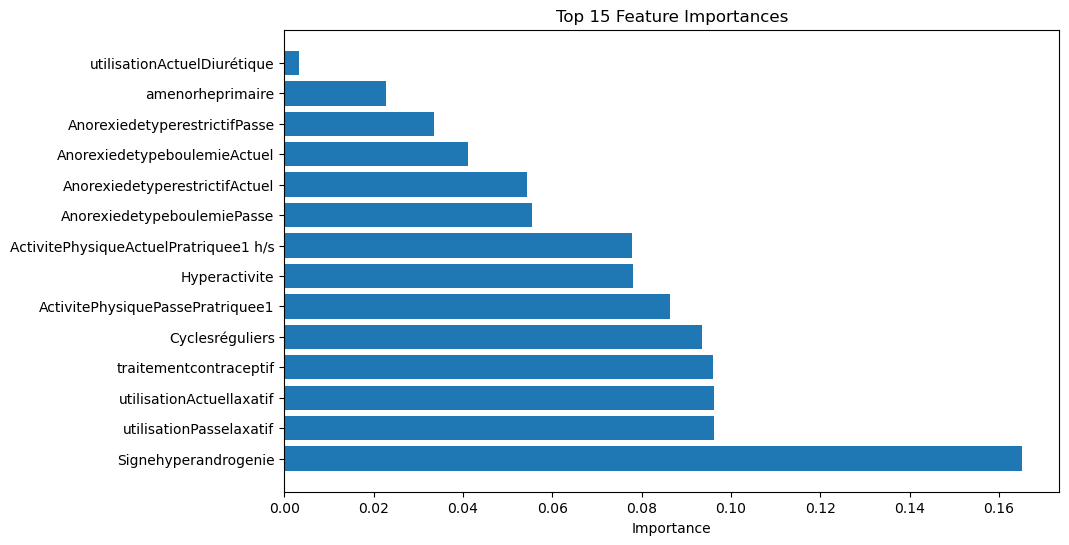

In [21]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rfc.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 15 features
top_features = feature_importance_df.head(20)

# Display the top 15 features
print(top_features)

# Plot the feature importances for the top 15 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances')
plt.show()

### Correlation Matrix

In [23]:
binary_columns.append('L1L4ZscoreSD')

# Sélection des colonnes
selected_columns = binary_columns

# Création d'un sous-dataframe avec les colonnes sélectionnées
selected_df = df[selected_columns]

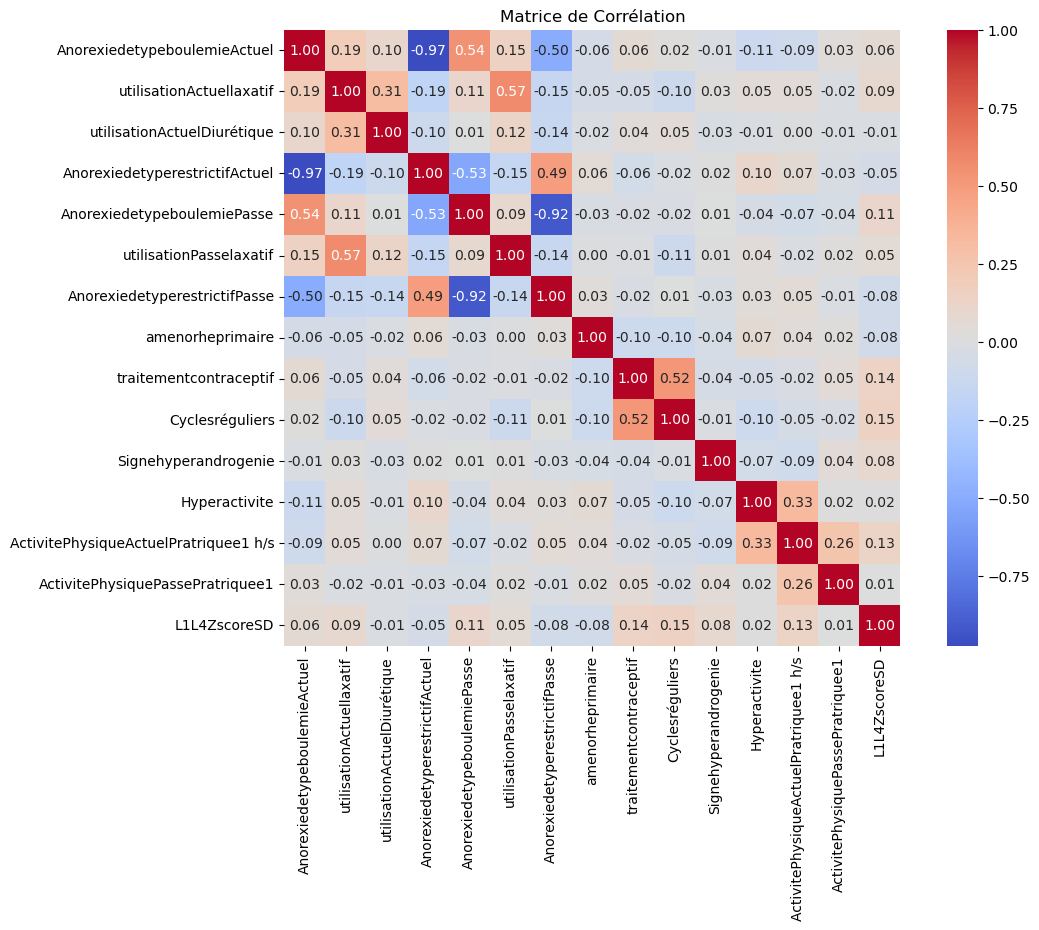

In [26]:
# Calcul de la matrice de corrélation
correlation_matrix = selected_df.corr()

# Création d'une heatmap avec Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matrice de Corrélation')
plt.show()